## Aglomerativo

Segmentación de Clientes Mayoristas

### Librerias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Libreria para la normalización de datos
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
# Libreria para el dendograma
from scipy.cluster.hierarchy import dendrogram, linkage
#import scipy.cluster.hierarchy as sch
# Libreria para el cluster Aglomerativo
from sklearn.cluster import AgglomerativeClustering

### Cargue de los datos

In [4]:
data = pd.read_csv('data/wholesale_customer.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Normalización de los datos

In [5]:
# Se normalizan los datos
normalized_data = normalize(data)
normalized_data = pd.DataFrame(normalized_data, columns=data.columns)
normalized_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
5,0.000146,0.000218,0.684944,0.600972,0.372997,0.048462,0.130615,0.105583
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056
7,0.000145,0.000217,0.548036,0.358368,0.681593,0.120685,0.240141,0.185547
8,0.000105,0.000315,0.625457,0.382637,0.649477,0.044578,0.179991,0.078667
9,0.000083,0.000125,0.250143,0.462010,0.786371,0.048271,0.309242,0.087379


### Dendograma

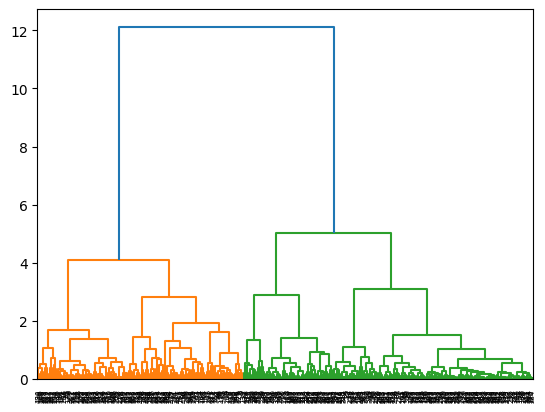

In [6]:
# Gráfica Dendograma con método 'ward'
# Se crea el dendograma
dendograma = dendrogram(linkage(normalized_data, method='ward', metric='euclidean'))

### Umbral

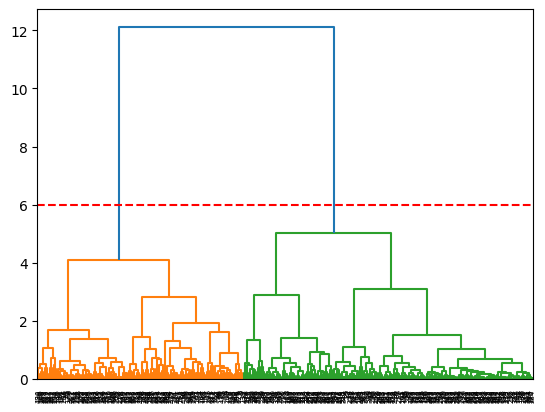

In [7]:
linkage_matrix = linkage(normalized_data, method='ward', metric='euclidean')

# Obtienes el dendrograma
dendrograma = dendrogram(linkage_matrix)

# Define el umbral deseado
umbral = 6

# Agrega el umbral al dendrograma utilizando plt.axhline
plt.axhline(y=umbral, color='r', linestyle='--') ## y= el valor del umbral

# Muestra el dendrograma con el umbral
plt.show()

### Clusters Aglomerativo

In [8]:
# Cluster Aglomerativo con: 2 clusters, afinidad euclidiana y enlace ward
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

ac.fit(normalized_data)

labels = ac.labels_

labels

c:\Users\Sergio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

### Visualización de los grupos

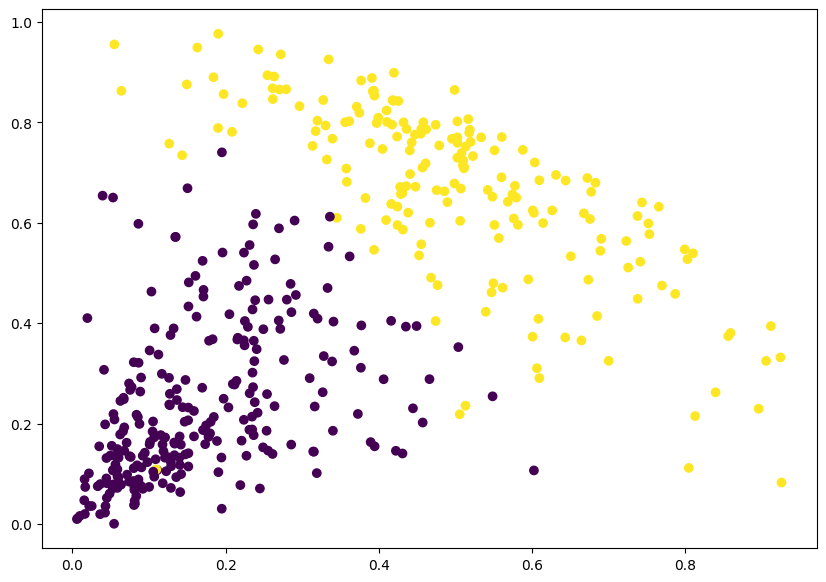

In [9]:
# Visualización de los grupos: 'Milk' eje X y 'Grocery' eje Y
plt.figure(figsize=(10,7))
plt.scatter(normalized_data['Milk'], normalized_data['Grocery'], c= ac.labels_)